<div style="display: flex; align-items: center;">
    <img src="https://raw.githubusercontent.com/ilastik/marching_cubes/master/test/image.png" alt="Image Alt Text" width="200" height="200" style="margin-right: 20px;">
    <div style="font-size: 60px;">
         <strong> 6<sup>th</sup> lab <strong>
    <div style="font-size: 40px;margin-right: 30px">
         <strong> Surfaces : extraction and meshes <strong>
    </div>
</div>

<table>
  <tr>
    <td style="background-color: rgba(114, 147, 203, 0.9); font-size: 15px; color: white; padding: 20px;">
      <div style="font-size: 20px"> 
          <strong>XCT Module (2 x 2h)</strong><br>
      </div>  
      <ul>
        <li> <strong> Week 1 : visualisation and using of ready-to-use functions</strong> (2h)</li>
        <ul>
           <li> discover scikit image libary for XCT 
           <li> read files
           <li> plot profiles and global criteria
           <li> projections, sinograms
           <li> reconstruction with library functions (inverse Radon, FBP, SART)
        </ul>
        <br> 
        <li> <strong> Week 2 : code writing and analyses</strong> (2h)</li>
        <ul>
           <li> SART reconstruction code
           <li> FBP coding
           <li> compare with ready-to-use functions
           <li> use of global and local metrics to compare the results
        </ul>
    </td>
    <td style="background-color: rgba(225, 151, 76, 0.7); font-size: 15px; color: white; padding: 20px; vertical-align: top;">
    <div style="font-size: 20px"> 
        <strong> MRI Module (2 x 2h)</strong><br>
    </div> 
    <ul>
        <li> <strong> Week 3 : visualisation and using of ready-to-use functions</strong> (2h)</li>
        <ul>
           <li> discover scikit image libary for MRI
           <li> read files
           <li> K-space coding
        </ul>
        <br> 
        <li> <strong> Week 4 : analyses and interpretations </strong> (2h)</li>
    </td>
    <td style="background-color: rgba(132, 186, 91, 0.8); font-size: 15px; color: white; padding: 20px; vertical-align: top;">
    <div style="font-size: 20px"> 
      <strong> Numerisation Module (2 x 2h)</strong><br>
    </div> 
      <ul>
        <li> <strong> Week 5 : depth map exploration </strong> (2h)</li>
        <br> 
        <li> <strong> Week 6 : point cloud and mesh understanding</strong> (2h)</li>
    </td>
  </tr>
</table>


<div style="display: flex; align-items: center;">
    <img src="https://img.freepik.com/premium-vector/warning-signs-high-voltage-hazard-isolated-white-background_68708-427.jpg?w=2000" alt="Image Alt Text" width="50" height="50" style="margin-right: 20px;">
    <div style="font-size: 15px;margin-right: 30px">
            Each lab must be completed before the beginning of the other lab session. 
        <br> 
          <strong>Don't forget to entitle your .ipynb file with your name and surname. <strong>
        <br> 
         The final submission of the last module has to be done <strong> after holidays on the 8<sup>th</sup>November before 10 am.</strong>
    </div>
</div>

<table>
      <td style="border-left: 3px solid rgba(114, 147, 203, 0.9); background-color: rgba(114, 147, 203, 0.1); font-size: 15px; color: blakc; padding-left: 30px;">
        Don't forget to legend your figures and graphs. Interpretations are expected and must by short but comprehensive.  
      </td>
</table>

#### Contact : meghna.parameswaran-ayyar@u-bordeaux.fr

<div style="display: flex; align-items: center;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/f/fb/Dolphin_triangle_mesh.png" alt="Image Alt Text" width="300" height="300" style="margin-right: 20px;">
    <div style="font-size: 30px;">
         <strong> Part 1<strong>
    <div style="font-size: 20px;margin-right: 30px">
         <strong> From PGM3D to mesh <strong>
    </div>
</div>

PGM3D is a semi-standard file format for the extension in 3D of the popular PGM (Portable GreyMap) format. It is very simple, being only a text file with a header containing basic information and the values of the voxels. 
Example of a PGM3D syntax :

PGM3D # Identifier
512 512 512 # Size 
45
154
56
.... # values of voxels

Values of voxels are separated by a space, a tabulation or a return. There are unformatted meaning that they can be on a single, a single column (as the example above), etc.


The goal of this part is to extract surfaces **between** area of different graylevels. These surfaces will be composed of squared faces that are the shared faces between two voxels of different intensities.
The algorithm is then very simple : for each voxel, check if its neighbors have a different intensity and, if so, create a face in the mesh corresponding to the shared face between this two voxels. To optimize this mesh for GPUs, the square face has to be cut in two triangle faces (beware of the order of the vertices to ensure the correct normal orientation - counter clockwise).

**Importing Libraries**

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from skimage import measure

### Visualize data

- Let's start with reading the text file efficiently and loading the voxels into an array that we can traverse easily for the surface extraction part. We will use the file 'shepplogan.pgm3d' given with this Lab.
- You will extract the __extension__, the __size__ and finally the __data__
- Display the 3D volume in its 3 views you can choose any 3 slices to do this

In [1]:
def readpgm(name):
    #initializing variables to store information
    array = []
    main_counter = 0
    
    with open(name) as f:
        lines = f.readlines()
        
        extension = lines[0].split('\n')[0] #obtaining file extension
        w, h, d = map(int, lines[1].split()) #obtaining cube shape
        shape = (w, h, d)  
    
        for row in lines:
            voxel = row.split('\n')[0]
            
            if main_counter >= 2:
                array.append(int(voxel)) #assigning voxels

            main_counter += 1

    return (extension, shape, array)

extension, shape, data = readpgm('shepplogan.pgm3d')
img_array = np.array(data)
img_array = np.reshape(data, shape, order='C')


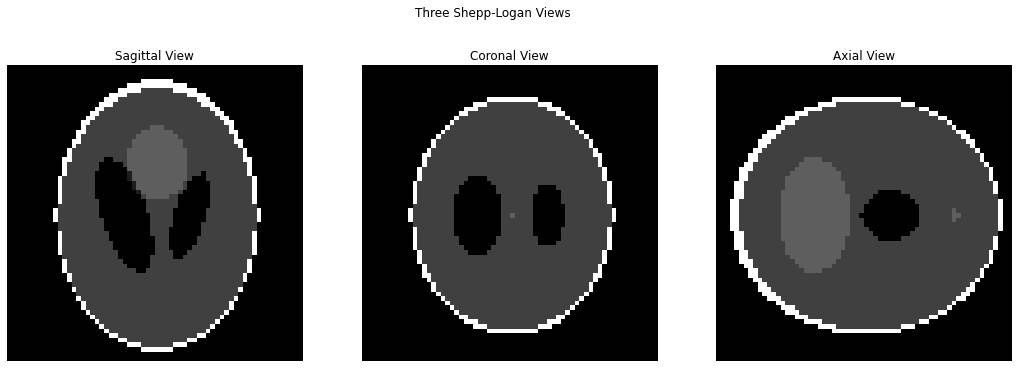

In [2]:
index = 30

sagittal_slice = img_array[index, :, :]
coronal_slice = img_array[:, index, :]
axial_slice = img_array[:, :, index]


plt.figure(figsize=(18, 6))

plt.suptitle('Three Shepp-Logan Views')
plt.subplot(1,3,1)
plt.imshow(sagittal_slice, cmap=plt.cm.Greys_r)
plt.title('Sagittal View')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(coronal_slice, cmap=plt.cm.Greys_r)
plt.title('Coronal View')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(axial_slice, cmap=plt.cm.Greys_r)
plt.title('Axial View')
plt.axis('off')

plt.show()

### Create a mesh

- Now, let's create a list of vertices and a list of faces and append these information when we find a face between two voxels of different intensities.
- You will write a code of nested loops that iterate over a 3D array to identify boundaries or surfaces between regions labeled with different values. These boundaries are represented as vertices and faces and will be stored in the __verticeList__ and __faceList__ lists.   

Before you begin the code have a look at the section that gives an example of the .obj file to be created to be clear what kind of vertice and face list you need to make in this code to be able to save it in the correct format and then use a visualizer to display it

In [29]:
def generate_mesh(data_array):
    x_size, y_size, z_size = data_array.shape

    vertices = []
    faces = []
    n = 0

    for x in range(x_size):
        for y in range(y_size):
            for z in range(z_size):
                voxel_intensity = data_array[x, y, z]

                # Using 3 neighbors instead of 6
                neighborhood = [
                    (x + 1, y, z),
                    (x, y + 1, z),
                    (x, y, z + 1),
                ]

                for neighbor_x, neighbor_y, neighbor_z in neighborhood:
                    if (
                        neighbor_x < x_size
                        and neighbor_y < y_size
                        and neighbor_z < z_size
                    ):
                        voxel_neighbor_intensity = data_array[neighbor_x, neighbor_y, neighbor_z]

                        if voxel_intensity != voxel_neighbor_intensity:
                            vertices.append((neighbor_x, neighbor_y, neighbor_z))
                            vertices.append((x + 1, y + 1, z))
                            vertices.append((x + 1, y, z + 1))
                            vertices.append((x + 1, y + 1, z + 1))
                            n += 4

                            faces.append((n - 4, n - 3, n - 2))
                            faces.append((n - 3, n - 2, n - 1))

    return vertices, faces


In [30]:
verticeList, faceList = generate_mesh(img_array)

vertices_tuple = [tuple(int(value) for value in row) for row in verticeList]
faces_tuple = [tuple(row) for row in faceList]

### Display the point cloud

- Verify your work with __verticeList__ using the code below or if you prefer use __plotly library__ 

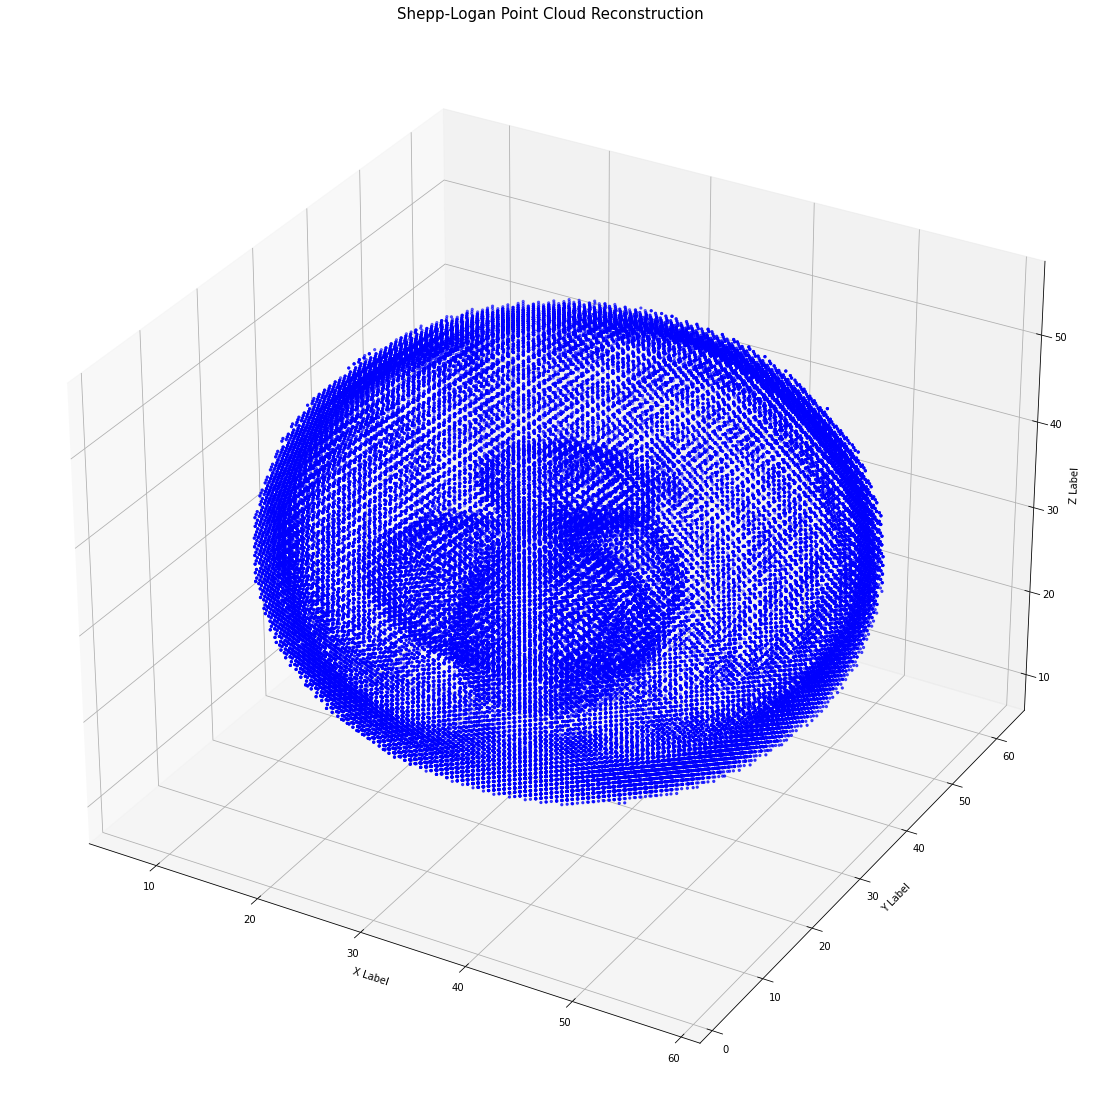

In [31]:
x, y, z= [x for x, y, z in verticeList], [y for x, y, z in verticeList], [z for x, y, z in verticeList]
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='b', marker='.')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title("Shepp-Logan Point Cloud Reconstruction" , fontsize=15)
plt.show()

### Combine the point cloud and your surface as a .obj file

In [36]:
# Function to create an OBJ file from the provided vertices, faces, and optional normals.
def create_obj(file_out_name, vertices, faces, normals=None):
    # Creates the output file name by appending ".obj" to the provided name.
    output_file = f"{file_out_name}.obj"

    # Opens the output file for writing.
    with open(output_file, 'w') as obj_file:
        # Write the vertices to the OBJ file.
        for vertex in vertices:
            obj_file.write(f"v {' '.join(map(str, vertex))}\n")

        # If normals are provided, write them to the OBJ file as well.
        if normals is not None:
            for normal in normals:
                obj_file.write(f"vn {' '.join(map(str, normal))}\n")

        # Writes the faces (triangles) to the OBJ file.
        for face in faces:
            obj_file.write("f")
            for vertex_index in face:
                obj_file.write(f" {vertex_index}")
            obj_file.write("\n")

    # Prints a message indicating that the OBJ file has been successfully saved.
    print(f"Obj file saved as {output_file}")


create_obj('shepp_logan_model', verticeList, faceList)

Obj file saved as shepp_logan_model.obj


<div style="display: flex; align-items: center;">
    <img src="https://paulbourke.net/geometry/polygonise/polygonise4.gif" alt="Image Alt Text" width="200" height="200" style="margin-right: 20px;">
    <div style="font-size: 30px;">
         <strong> Part 2<strong>
    <div style="font-size: 20px;margin-right: 30px">
         <strong> Marching Cubes Algorithm<strong>
    </div>
</div>

The Marching Cubes algorithm (Marching Square in 2D) is designed to extract 2D surfaces from a 3D (voxels) volume. It relies on the concept of isosurfaces. An isosurface is the surface separating two different material. For instance in the Shepp-Logan phantom, there is an isosurface between the exterior of the phantow (graylevel 0) and its outer shell (graylevel 255). It is often used in medical imaging to visualize a specific structure (for instance bones which are easy to segment in CT scan). 
As we have seen during the course, it uses a lookup table to find the configuration between the neighbors of a voxel to create faces.

An isosurface is a three-dimensional analog of an isoline. It is a surface that represents points of a constant value within a volume of space; in other words, it is a level set of a continuous function whose domain is 3-space. 

For reference :
- marching squares animated : https://jamie-wong.com/2014/08/19/metaballs-and-marching-squares/
- the original paper from Lorensen and Cline : https://citeseerx.ist.psu.edu/doc/10.1.1.132.3930
- A full implementation of the algorithm can be found at https://github.com/alvin-yang68/Marching-Cubes/tree/main
- Check carefully the reference https://paulbourke.net/geometry/polygonise/

### Try the ready-to-use scikit functions

- You have an example of use at https://scikit-image.org/docs/stable/auto_examples/edges/plot_marching_cubes.html 
- Now, you have to use these Scikit functions on the shepplogan.pgm3d phantom to extract its isosurfaces.
- You can either save them in an OBJ file or visualize them directly on the notebook with the functions provided in the example above.

**Obtaining Vertices, faces, normals and values using skimage's function**

In [43]:
# Performing the marching cubes algorithm to extract the
# vertices, faces, normals, and values of the 3D surface mesh.
vertices, faces, normals, values = measure.marching_cubes(img_array, 0)

vertices_tuple = [tuple(int(value) for value in row) for row in vertices]
faces_tuple = [tuple(row) for row in faces]
normals_tuple = [tuple(row) for row in normals]

**Visualizing Point Cloud**

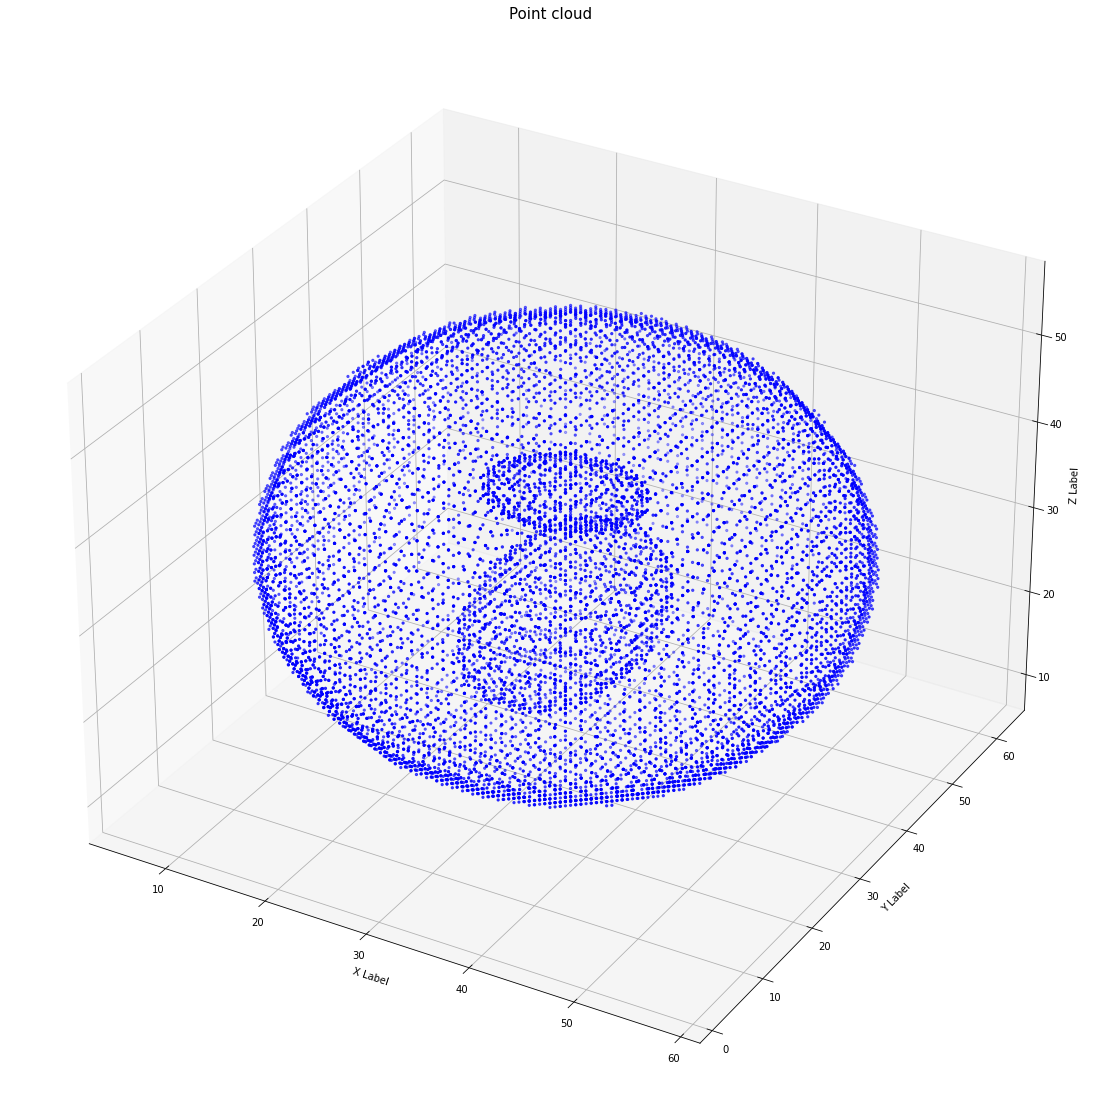

In [51]:
x, y, z= [x for x, y, z in vertices_tuple], [y for x, y, z in vertices_tuple], [z for x, y, z in vertices_tuple]
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='b', marker='.')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title("Point cloud", fontsize=15)
plt.show()

In [46]:
fig = go.Figure(data=[
    go.Mesh3d(
        x=[item[0] for item in vertices_tuple],
        y=[item[1] for item in vertices_tuple],
        z=[item[2] for item in vertices_tuple],
        color = 'rgb(120, 120, 120)',
        opacity = 0.3,
        i = [item[0] for item in faces_tuple],
        j = [item[1] for item in faces_tuple],
        k = [item[2] for item in faces_tuple],
        showscale=True
    )
])

fig.show()

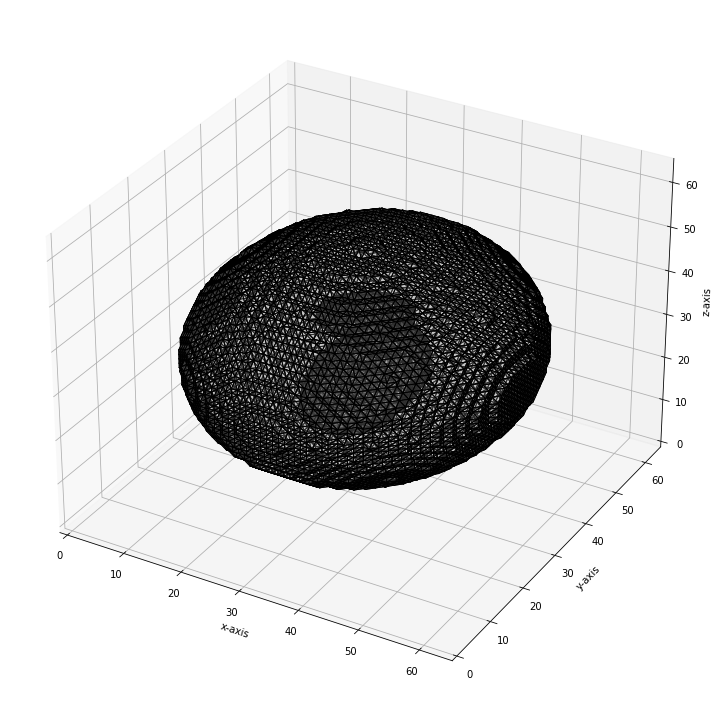

In [45]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

mesh = Poly3DCollection(vertices[faces])
mesh.set_edgecolor('k')

mesh.set_facecolor([0.6, 0.6, 0.6, 0.3])

ax.add_collection3d(mesh)

ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.set_zlabel("z-axis")

ax.set_xlim(0, shape[0])
ax.set_ylim(0, shape[1])
ax.set_zlim(0, shape[2])

plt.tight_layout()
plt.show()


**Saving point cloud as obj file**

In [42]:
create_obj('shepp_logan_marching_cube', vertices_tuple, faces_tuple, normals_tuple)

Obj file saved as shepp_logan_marching_cube.obj
